In [7]:
# import the necessary libraries

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import re
# pd.set_option('display.width', 500)
# pd.set_option('display.max_columns', 200)
# pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
# %config InlineBackend.figure_format ='retina'

%matplotlib inline

In [134]:
df = pd.read_csv("data.csv")

In [25]:
#check the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                637 non-null    int64  
 1   marketplace       637 non-null    object 
 2   review_date       637 non-null    object 
 3   customer_id       637 non-null    int64  
 4   review_id         637 non-null    object 
 5   product_id        637 non-null    object 
 6   product_parent    637 non-null    int64  
 7   product_title     637 non-null    object 
 8   product_category  637 non-null    object 
 9   total_rating      637 non-null    int64  
 10  product_rating    637 non-null    int64  
 11  shipment_rating   24 non-null     float64
 12  seller_rating     15 non-null     float64
 13  helpful_votes     637 non-null    int64  
 14  total_votes       637 non-null    int64  
 15  review_headline   637 non-null    object 
 16  review_body       637 non-null    object 
dt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                637 non-null    int64 
 1   marketplace       637 non-null    object
 2   review_date       637 non-null    object
 3   customer_id       637 non-null    object
 4   review_id         637 non-null    object
 5   product_id        637 non-null    object
 6   product_parent    637 non-null    object
 7   product_title     637 non-null    object
 8   product_category  637 non-null    object
 9   total_rating      637 non-null    object
 10  product_rating    637 non-null    object
 11  shipment_rating   637 non-null    object
 12  seller_rating     637 non-null    object
 13  helpful_votes     637 non-null    int64 
 14  total_votes       637 non-null    int64 
 15  review_headline   637 non-null    object
 16  review_body       637 non-null    object
dtypes: int64(3), obj

In [4]:
#check for the missing data
print(np.sum(df.marketplace.isnull()))
print(np.sum(df.review_date.isnull()))
print(np.sum(df.customer_id.isnull()))
print(np.sum(df.review_id.isnull()))
print(np.sum(df.product_id.isnull()))
print(np.sum(df.product_parent.isnull()))
print(np.sum(df.product_title.isnull()))
print(np.sum(df.product_category.isnull()))
print(np.sum(df.total_rating.isnull()))
print(np.sum(df.product_rating.isnull()))
print(np.sum(df.shipment_rating.isnull()))
print(np.sum(df.seller_rating.isnull()))
print(np.sum(df.helpful_votes.isnull()))
print(np.sum(df.total_votes.isnull()))
print(np.sum(df.review_headline.isnull()))
print(np.sum(df.review_body.isnull()))
# the missing data is due to the reviews about shipping and seller are not presnet


0
0
0
0
0
0
0
0
0
0
613
622
0
0
0
0


In [135]:
#replace the data with zero
df.replace(np.nan,0,inplace = True)

In [5]:
df.head()

,id,marketplace,review_date,customer_id,review_id,product_id,product_parent,product_title,product_category,total_rating,product_rating,shipment_rating,seller_rating,helpful_votes,total_votes,review_headline,review_body
0,0,US,31-08-2015,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,2,NaN,NaN,1,3,"Looks good, functions meh",2 issues - Once I turned on the circle apps an...
1,1,US,31-08-2015,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,4,NaN,NaN,0,0,A fun little gadget,"I’m embarrassed to admit that until recently, ..."
2,2,US,31-08-2015,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,5,NaN,NaN,0,0,Five Stars,Fits iPhone 6 well
3,3,US,31-08-2015,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,5,NaN,NaN,0,0,Great charger,Great charger. I easily get 3+ charges on a Sa...
4,4,US,31-08-2015,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,5,NaN,NaN,0,0,Five Stars,Great for the price :-)


In [19]:
df[df['review_date'].apply(lambda x: True if re.search('\d+-\d+-\d+', x) else False)]
df[df['review_date'].apply(lambda x: True if re.search('\d+/\d+/\d+', x) else False)]

df.loc[df[df['review_date'].apply(lambda x: True if re.search('\d+/\d+/\d+', x) else False)], 'review_date'] = pd.to_datetime(df['review_date'], format='%m/%d/%y')


ValueError: time data '31-08-2015' does not match format '%m/%d/%y' (match)

In [7]:
#checking the co-relation between differnt columns
df.corr()

,Unnamed: 0,customer_id,product_parent,total_rating,product_rating,shipment_rating,seller_rating,helpful_votes,total_votes
Unnamed: 0,1.000000,0.011012,-0.017552,0.096135,0.096135,0.183160,-0.341730,-0.015283,-0.014307
customer_id,0.011012,1.000000,0.026988,0.060042,0.060042,0.196925,0.009153,0.030152,0.009146
product_parent,-0.017552,0.026988,1.000000,-0.019948,-0.019948,-0.327095,-0.414559,-0.006713,-0.009633
total_rating,0.096135,0.060042,-0.019948,1.000000,1.000000,0.215594,0.709524,-0.106574,-0.133787
product_rating,0.096135,0.060042,-0.019948,1.000000,1.000000,0.215594,0.709524,-0.106574,-0.133787
shipment_rating,0.183160,0.196925,-0.327095,0.215594,0.215594,1.000000,1.000000,-0.263714,-0.278475
seller_rating,-0.341730,0.009153,-0.414559,0.709524,0.709524,1.000000,1.000000,0.236173,0.250818
helpful_votes,-0.015283,0.030152,-0.006713,-0.106574,-0.106574,-0.263714,0.236173,1.000000,0.975719
total_votes,-0.014307,0.009146,-0.009633,-0.133787,-0.133787,-0.278475,0.250818,0.975719,1.000000


AttributeError: 'Axes' object has no attribute 'unique'

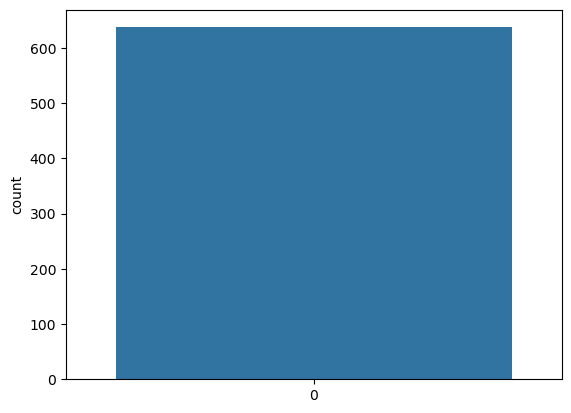

In [8]:
#check the unique values
#Plot the unique values

sns.countplot(df['total_rating']).unique()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'product_parent'}>],
       [<Axes: title={'center': 'total_rating'}>,
        <Axes: title={'center': 'product_rating'}>,
        <Axes: title={'center': 'shipment_rating'}>],
       [<Axes: title={'center': 'seller_rating'}>,
        <Axes: title={'center': 'helpful_votes'}>,
        <Axes: title={'center': 'total_votes'}>]], dtype=object)

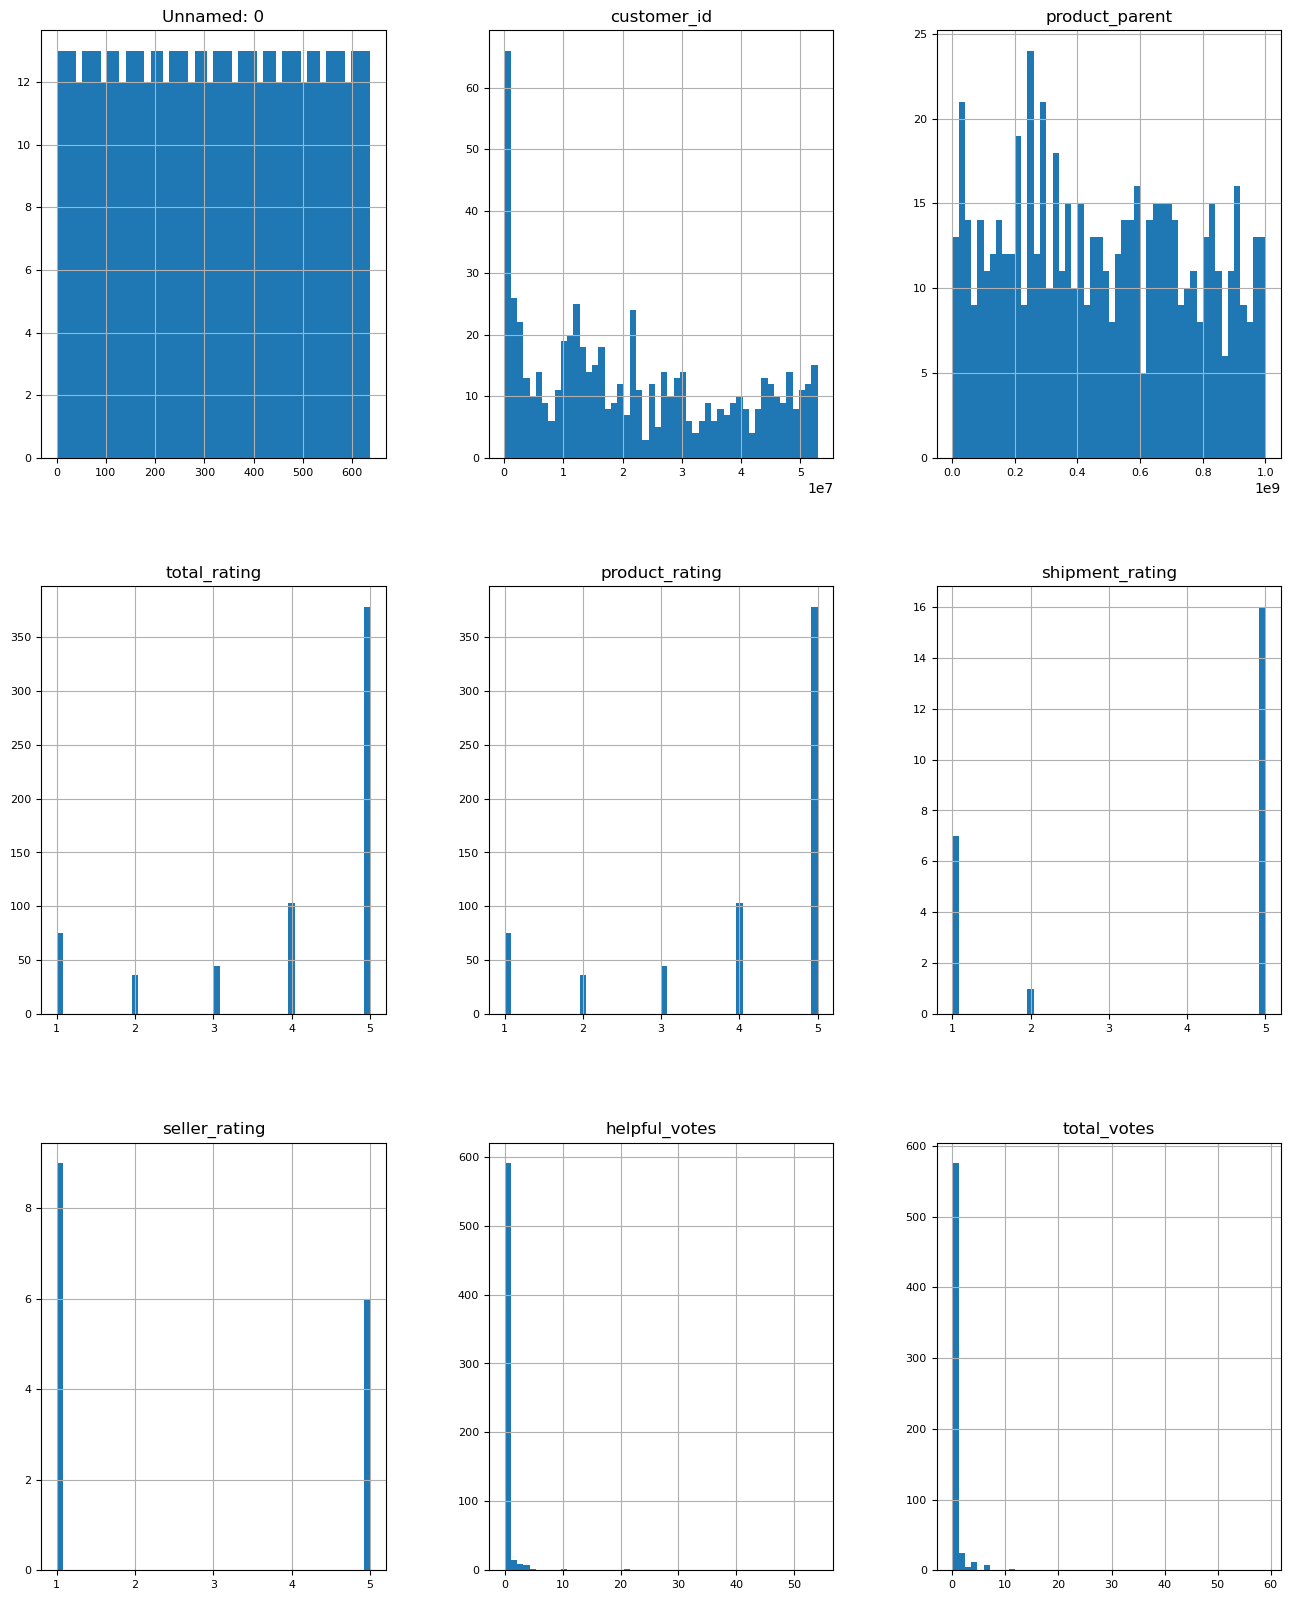

In [9]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [45]:
df['product_id'].value_counts().head(50)
df[df['product_id'] == 'B0113ISNRE']
df['total_rating'].unique()

array([2, 4, 5, 3, 1])

<Axes: xlabel='total_rating', ylabel='count'>

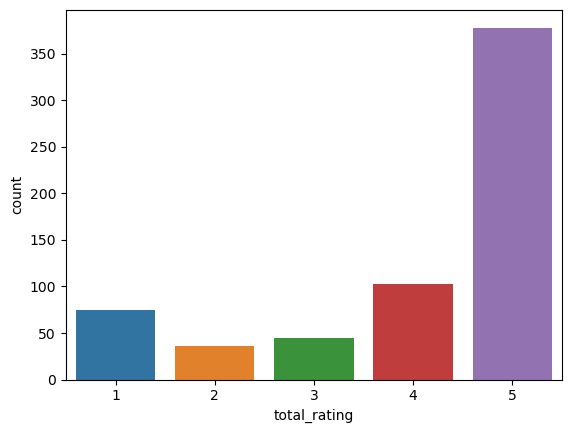

In [58]:
sns.countplot(data=df, x='total_rating')


[Text(0.5, 0, "reviews' word count"), Text(0, 0.5, 'count')]

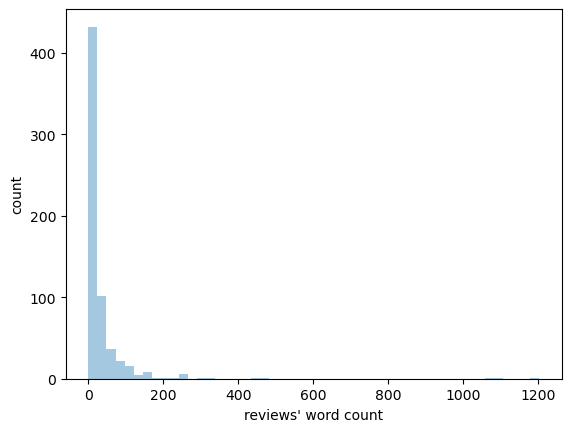

In [63]:
ax = sns.distplot(df['review_body'].str.split().str.len(), kde=False)
ax.set(xlabel='reviews\' word count', ylabel='count')

In [86]:
from collections import Counter
words = df['review_body'].str.split()
words = np.concatenate([np.array(x) for x in words.array])
words = Counter(words)
words.most_common(50)
words_fr = pd.DataFrame.from_dict(words).reset_index()
words_fr.head()

# ax = sns.countplot(data=words.most_common(50))
# ax.set(xlabel='reviews\' word count', ylabel='count')

ValueError: If using all scalar values, you must pass an index

<Axes: >

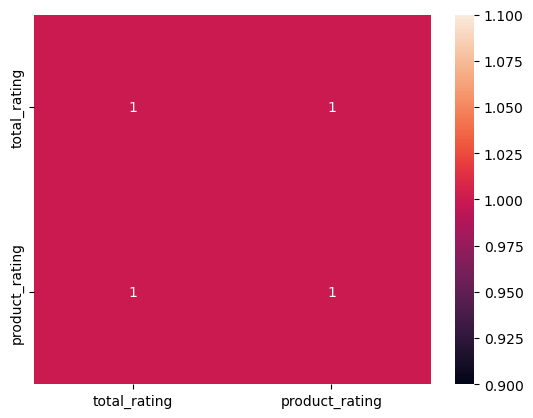

In [90]:
fig, ax = plt.subplots()
sns.heatmap(df[['total_rating', 'product_rating']].corr(), annot=True)

['n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a', 'n/a'

<Axes: ylabel='Count'>

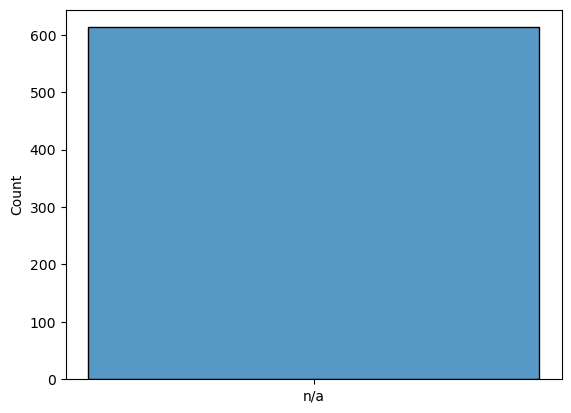

In [150]:
# tmp = df['shipment_rating'].astype(int).astype(str).map({'0': 'n/a'}).map({np.nan: 'n/a'})
# print(np.array(tmp))
tmp = ['n/a' for x in np.array(df['shipment_rating'].astype(int).astype(str)) if x == '0']
print(tmp)
# sns.countplot(x=tmp, order = tmp.value_counts().index)
sns.histplot(['n/a' for x in np.array(df['shipment_rating'].astype(int).astype(str)) if x == '0']).set(title='Shipment rating distribution', xlabel='Rating', ylabel='Number of reviews')
# df['shipment_rating'].astype(int).astype(str).map({'0': 'n/a'})